In [81]:
import pandas as pd
import numpy as np
import ppscore as pps

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import confusion_matrix 
# from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split
 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import *
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import _tree
from sklearn.tree import export_text
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, anneal
from hyperopt import space_eval
import itertools

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import f1_score
from sklearn import metrics


from matplotlib.colors import ListedColormap

In [3]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
df.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


In [5]:
df.shape

(19104, 13)

In [6]:
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [8]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
emp_record=pd.DataFrame(df["Emp_ID"].value_counts().reset_index(name="Emp_counts")).rename(columns={"index": "Emp_ID"})

In [10]:
df.loc[df["LastWorkingDate"].isna(),"resn_indicator"]=0
df.loc[df["LastWorkingDate"].notna(),"resn_indicator"]=1

In [11]:
df.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,resn_indicator
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0.0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0.0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0.0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0.0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1,0.0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1.0


In [12]:
df["City"].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [13]:
df["Education_Level"].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [14]:
df["Dateofjoining"]=pd.to_datetime(df.Dateofjoining)
df["monthofjoining"]=df.Dateofjoining.dt.month_name()
df["yearofjoining"]=df.Dateofjoining.dt.year


df["LastWorkingDate"]=pd.to_datetime(df.LastWorkingDate)
df["monthoflwd"]=df.LastWorkingDate.dt.month_name()
df["yearoflwd"]=df.LastWorkingDate.dt.year

df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])
df["report_month"]=df["MMM-YY"].dt.month_name()
df["Exp"]=((df["MMM-YY"]-df["Dateofjoining"])/np.timedelta64(1, 'M'))

In [15]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,resn_indicator,monthofjoining,yearofjoining,monthoflwd,yearoflwd,report_month,Exp
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0.0,December,2015,NaN,NaN,January,0.262839
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0.0,December,2015,NaN,NaN,February,1.281340
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0,December,2015,March,2016.0,March,2.234132
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0,November,2017,NaN,NaN,November,-0.164274
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0,November,2017,NaN,NaN,December,0.821372


In [16]:
df["Exp"].dtypes

dtype('float64')

In [17]:
df.loc[df["Exp"]<0,"Exp"]=0

In [18]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,resn_indicator,monthofjoining,yearofjoining,monthoflwd,yearoflwd,report_month,Exp
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0.0,December,2015,NaN,NaN,January,0.262839
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0.0,December,2015,NaN,NaN,February,1.281340
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0,December,2015,March,2016.0,March,2.234132
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0,November,2017,NaN,NaN,November,0.000000
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0,November,2017,NaN,NaN,December,0.821372


In [19]:
df=pd.merge(df,emp_record,on="Emp_ID",how="inner")

In [20]:
df.shape

(19104, 21)

In [21]:
df["lead6"]=df.sort_values(['MMM-YY','Emp_ID']).groupby(['Emp_ID'])['resn_indicator'].shift(-6)

In [22]:
df["resn_lead6"] = df.groupby('Emp_ID')['lead6'].transform(lambda x: x.ffill())
df.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,...,resn_indicator,monthofjoining,yearofjoining,monthoflwd,yearoflwd,report_month,Exp,Emp_counts,lead6,resn_lead6
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,0.0,December,2015,NaN,NaN,January,0.262839,3,NaN,NaN
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,0.0,December,2015,NaN,NaN,February,1.281340,3,NaN,NaN
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,1.0,December,2015,March,2016.0,March,2.234132,3,NaN,NaN
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0.0,November,2017,NaN,NaN,November,0.000000,2,NaN,NaN
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0.0,November,2017,NaN,NaN,December,0.821372,2,NaN,NaN
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,0.0,December,2016,NaN,NaN,December,0.000000,5,NaN,NaN
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,0.0,December,2016,NaN,NaN,January,0.821372,5,NaN,NaN
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,0.0,December,2016,NaN,NaN,February,1.839874,5,NaN,NaN
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,0.0,December,2016,NaN,NaN,March,2.759810,5,NaN,NaN
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,1.0,December,2016,April,2017.0,April,3.778312,5,NaN,NaN


In [23]:
df[df["Emp_counts"]<=6]["resn_lead6"].unique()

array([nan])

In [24]:
lt6=df[df["Emp_counts"]<=6].groupby("Emp_ID")["resn_indicator"].sum().reset_index(name="ind_lt6")

In [25]:
df1=pd.merge(df,lt6,on="Emp_ID",how="left")

In [26]:
df1.shape

(19104, 24)

In [27]:
df1.loc[df1["resn_lead6"].isnull(),"resn_lead6"]=df1["ind_lt6"]
df1["resn_lead6"].unique()

array([1., 0.])

In [28]:
df1.head(20)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,...,monthofjoining,yearofjoining,monthoflwd,yearoflwd,report_month,Exp,Emp_counts,lead6,resn_lead6,ind_lt6
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,December,2015,NaN,NaN,January,0.262839,3,NaN,1.0,1.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,December,2015,NaN,NaN,February,1.281340,3,NaN,1.0,1.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,December,2015,March,2016.0,March,2.234132,3,NaN,1.0,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,November,2017,NaN,NaN,November,0.000000,2,NaN,0.0,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,November,2017,NaN,NaN,December,0.821372,2,NaN,0.0,0.0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,December,2016,NaN,NaN,December,0.000000,5,NaN,1.0,1.0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,December,2016,NaN,NaN,January,0.821372,5,NaN,1.0,1.0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,December,2016,NaN,NaN,February,1.839874,5,NaN,1.0,1.0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,...,December,2016,NaN,NaN,March,2.759810,5,NaN,1.0,1.0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,December,2016,April,2017.0,April,3.778312,5,NaN,1.0,1.0


In [29]:
emp_record.shape, df1["Emp_ID"].nunique()

((2381, 2), 2381)

In [30]:
df1["Education_Level"].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

In [31]:
df1['Edu_Level'] = df1['Education_Level'].map({'College': 1,'Bachelor': 2,'Master': 3})

In [32]:
#Create new variables/features from Salary and Total Business Value

#df1["TBV_lag"]=df1.sort_values('MMM-YY').groupby('Emp_ID')["Total Business Value"].shift()
df1.loc[df1["Total Business Value"]>0,"TBV_ind"]=1
df1["TBV_ind"].fillna(0,inplace=True)



df1["Salary_lag"]=df1.sort_values('MMM-YY').groupby('Emp_ID')["Salary"].shift()
df1.loc[df1["Salary"]>df1["Salary_lag"],"Salary_increase"]=1
df1["Salary_increase"].fillna(0,inplace=True)


df1[["Emp_ID","MMM-YY","Total Business Value","TBV_ind","Salary","Salary_lag","Salary_increase"]]

,Emp_ID,MMM-YY,Total Business Value,TBV_ind,Salary,Salary_lag,Salary_increase
0,1,2016-01-01,2381060,1.0,57387,NaN,0.0
1,1,2016-02-01,-665480,0.0,57387,57387.0,0.0
2,1,2016-03-01,0,0.0,57387,57387.0,0.0
3,2,2017-11-01,0,0.0,67016,NaN,0.0
4,2,2017-12-01,0,0.0,67016,67016.0,0.0
...,...,...,...,...,...,...,...
19099,2788,2017-08-01,740280,1.0,70254,70254.0,0.0
19100,2788,2017-09-01,448370,1.0,70254,70254.0,0.0
19101,2788,2017-10-01,0,0.0,70254,70254.0,0.0
19102,2788,2017-11-01,200420,1.0,70254,70254.0,0.0


In [33]:
df1["Salary_increase"].value_counts()

0.0    19060
1.0       44
Name: Salary_increase, dtype: int64

In [34]:
# df1["TBV_cumsum"]=
df1["TBV_cummean"]=(df1.groupby("Emp_ID")["TBV_ind"].cumsum())/(df1.groupby("Emp_ID").cumcount()+1)

In [35]:
#Creating QTR, YR month and DOW
df1['Quarter']="Q"+(df1['MMM-YY'].dt.quarter).astype(str)

In [36]:
df1.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,...,Emp_counts,lead6,resn_lead6,ind_lt6,Edu_Level,TBV_ind,Salary_lag,Salary_increase,TBV_cummean,Quarter
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,3,NaN,1.0,1.0,3,1.0,NaN,0.0,1.000000,Q1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,...,3,NaN,1.0,1.0,3,0.0,57387.0,0.0,0.500000,Q1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,3,NaN,1.0,1.0,3,0.0,57387.0,0.0,0.333333,Q1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,2,NaN,0.0,0.0,3,0.0,NaN,0.0,0.000000,Q4
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,2,NaN,0.0,0.0,3,0.0,67016.0,0.0,0.000000,Q4


In [37]:
df2 = pd.get_dummies(data=df1, columns=["Gender","City","Quarter","report_month"], drop_first=True)
df2.head()

,MMM-YY,Emp_ID,Age,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,...,report_month_December,report_month_February,report_month_January,report_month_July,report_month_June,report_month_March,report_month_May,report_month_November,report_month_October,report_month_September
0,2016-01-01,1,28,Master,57387,2015-12-24,NaT,1,1,2381060,...,0,0,1,0,0,0,0,0,0,0
1,2016-02-01,1,28,Master,57387,2015-12-24,NaT,1,1,-665480,...,0,1,0,0,0,0,0,0,0,0
2,2016-03-01,1,28,Master,57387,2015-12-24,2016-03-11,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2017-11-01,2,31,Master,67016,2017-11-06,NaT,2,2,0,...,0,0,0,0,0,0,0,1,0,0
4,2017-12-01,2,31,Master,67016,2017-11-06,NaT,2,2,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
c=list(test["Emp_ID"].unique())

In [39]:
#Train and Test data
train_fin=df2[~((df2["Emp_ID"].isin(c)) 
               & 
               (df2["MMM-YY"] >= "2017-07-01"))]

test_fin=df2[(df2["Emp_ID"].isin(c)) 
            & 
            (df2["MMM-YY"] >= "2017-07-01")]

In [40]:
train_fin.shape, test_fin.shape

((15571, 69), (3533, 69))

In [41]:
train_fin["resn_lead6"].value_counts()

1.0    7915
0.0    7656
Name: resn_lead6, dtype: int64

In [42]:
train_fin.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Education_Level', 'Salary', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'resn_indicator',
       'monthofjoining', 'yearofjoining', 'monthoflwd', 'yearoflwd', 'Exp',
       'Emp_counts', 'lead6', 'resn_lead6', 'ind_lt6', 'Edu_Level', 'TBV_ind',
       'Salary_lag', 'Salary_increase', 'TBV_cummean', 'Gender_Male',
       'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15',
       'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20',
       'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26',
       'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5',
       'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Quarter_Q2', 'Quarter_Q3',
       'Quarter_Q4', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June

In [43]:
train_fin["resn_lead6"]=train_fin["resn_lead6"].astype("int64")

<ipython-input-43-e4a430b6d612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fin["resn_lead6"]=train_fin["resn_lead6"].astype("int64")


In [44]:
train_fin.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Education_Level', 'Salary', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'resn_indicator',
       'monthofjoining', 'yearofjoining', 'monthoflwd', 'yearoflwd', 'Exp',
       'Emp_counts', 'lead6', 'resn_lead6', 'ind_lt6', 'Edu_Level', 'TBV_ind',
       'Salary_lag', 'Salary_increase', 'TBV_cummean', 'Gender_Male',
       'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15',
       'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20',
       'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26',
       'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5',
       'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Quarter_Q2', 'Quarter_Q3',
       'Quarter_Q4', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June

In [45]:
cols=['Emp_ID',"MMM-YY",'Age', 'Joining Designation', 'Designation', 'Quarterly Rating', 'Exp',
       'Edu_Level', 'Gender_Male', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9', 'Quarter_Q2','Quarter_Q3','Quarter_Q4','resn_lead6','Salary_increase','TBV_cummean',
       'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June', 'report_month_March', 'report_month_May',
       'report_month_November', 'report_month_October',
       'report_month_September']

In [46]:
len(cols)

54

In [47]:
data_train=train_fin[cols]
data_train=data_train.drop(["Emp_ID","MMM-YY"],axis=1)

In [48]:
test_fin.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Education_Level', 'Salary', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'resn_indicator',
       'monthofjoining', 'yearofjoining', 'monthoflwd', 'yearoflwd', 'Exp',
       'Emp_counts', 'lead6', 'resn_lead6', 'ind_lt6', 'Edu_Level', 'TBV_ind',
       'Salary_lag', 'Salary_increase', 'TBV_cummean', 'Gender_Male',
       'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15',
       'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20',
       'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26',
       'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5',
       'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Quarter_Q2', 'Quarter_Q3',
       'Quarter_Q4', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June

In [49]:
data_test=test_fin[cols]
data_test=data_test.drop(["resn_lead6"],axis=1)

In [50]:
data_test.shape

(3533, 53)

In [51]:
data_test.set_index(["Emp_ID","MMM-YY"],inplace=True)

# Decision Tree

In [52]:
#Decision Tree 2 with lead 6


#seperating independent and dependent variables
x = data_train.drop(['resn_lead6'], axis=1)
y = data_train['resn_lead6']
x.shape, y.shape

((15571, 51), (15571,))

In [55]:
def plot_confusion_matrix2(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [56]:
def optimize_hyperparam(X, y, n_eval=100):
        #X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=test_size, shuffle=self.shuffle)
        X1=X.copy()
        y1=y.copy()
#         y1=pd.get_dummies(y1)['DF']
        X_train, X_test, y_train, y_test = train_test_split(X1 , y1, test_size = 0.2, random_state = 42)
        hyperparameter_space_dtr = {'dtr_criterion': hp.choice('dtr_criterion', ["entropy","gini"]),
                                    
                                    'dtr_max_depth': hp.uniform("dtr_max_depth", 
                                                                2, 10),
                                    'dtr_min_samples_split': hp.uniform("dtr_min_samples_split", 
                                                                        2, 40),
                                    'dtr_min_samples_leaf':  hp.uniform('dtr_min_samples_leaf', 
                                                                        1, 20),
                                    'dtr_max_leaf_nodes': hp.uniform("dtr_max_leaf_nodes", 
                                                                    2, 20) 
                    }
        
        RANDOM_SEED = np.random.RandomState(42)
        def fetch_model(search_space_val):
            model = DecisionTreeClassifier(                
            max_depth=int(search_space_val['dtr_max_depth']),
                
            min_samples_split=int(
              search_space_val['dtr_min_samples_split']),
                
            min_samples_leaf=int(
              search_space_val['dtr_min_samples_leaf']),
                
            max_leaf_nodes=int(
                search_space_val['dtr_max_leaf_nodes']),
                
            criterion='entropy',
            splitter='best',
            random_state=1)
            return model
        
        def objective_model(sp_space):
            clf =fetch_model(sp_space) 
            rskf = RepeatedStratifiedKFold(n_splits=2, random_state=1)
            acc = cross_val_score(clf, 
                                  X_train, 
                                  y_train,
                                  scoring=make_scorer(f1_score, average='weighted'),
                                  cv=rskf,
                                  n_jobs=1).mean()
            return {"loss": -acc, "status": STATUS_OK }
        
        trials = Trials()
        best = fmin(fn=objective_model, 
                    space=hyperparameter_space_dtr, 
                    algo=anneal.suggest, 
                    max_evals=n_eval, 
                    trials=trials,
                    #rstate=RANDOM_SEED
                    )
        
        best_param = fetch_model(best)
        
        print(best_param)
        
        best_param.fit(X_train, y_train)
        
        y_pred = best_param.predict(X_test)
        print(X_train.columns)
        
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        
#         plot_confusion_matrix(best_param, X_test, y_test ,display_labels=class_names)
#         class_names2 = ['1', '2','3','4', '5','6']
#         plot_confusion_matrix(y_test, y_pred 
#                               ,classes=class_names2
#                              )
        # Compute confusion matrix
        #cnf_matrix = confusion_matrix(y_test, y_pred)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix2(cm, classes=['not resign','resign'],
                      title='Confusion matrix, without normalization')
        plt.show()
        
        print(classification_report(y_test, y_pred 
                                     ,target_names=['not resign','resign']
                                   ))
        
        fig= plt.figure(figsize=(70,50))
        _ = tree.plot_tree(best_param,
                           feature_names=X_train.columns, 
                            class_names=['not resign','resign'],
                       filled=True)
        return best_param    

100%|█████████████████████████████████████████████| 100/100 [01:05<00:00,  1.52trial/s, best loss: -0.7515229767175278]
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=18,
                       min_samples_leaf=9, min_samples_split=25,
                       random_state=1)
Index(['Age', 'Joining Designation', 'Designation', 'Quarterly Rating', 'Exp',
       'Edu_Level', 'Gender_Male', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4', 'Salary_increase',
       'TBV_cummean', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_

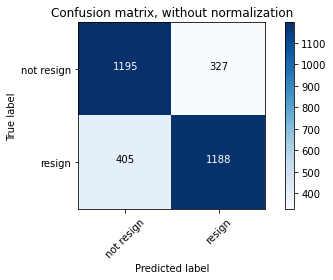

              precision    recall  f1-score   support

  not resign       0.75      0.79      0.77      1522
      resign       0.78      0.75      0.76      1593

    accuracy                           0.77      3115
   macro avg       0.77      0.77      0.77      3115
weighted avg       0.77      0.77      0.76      3115



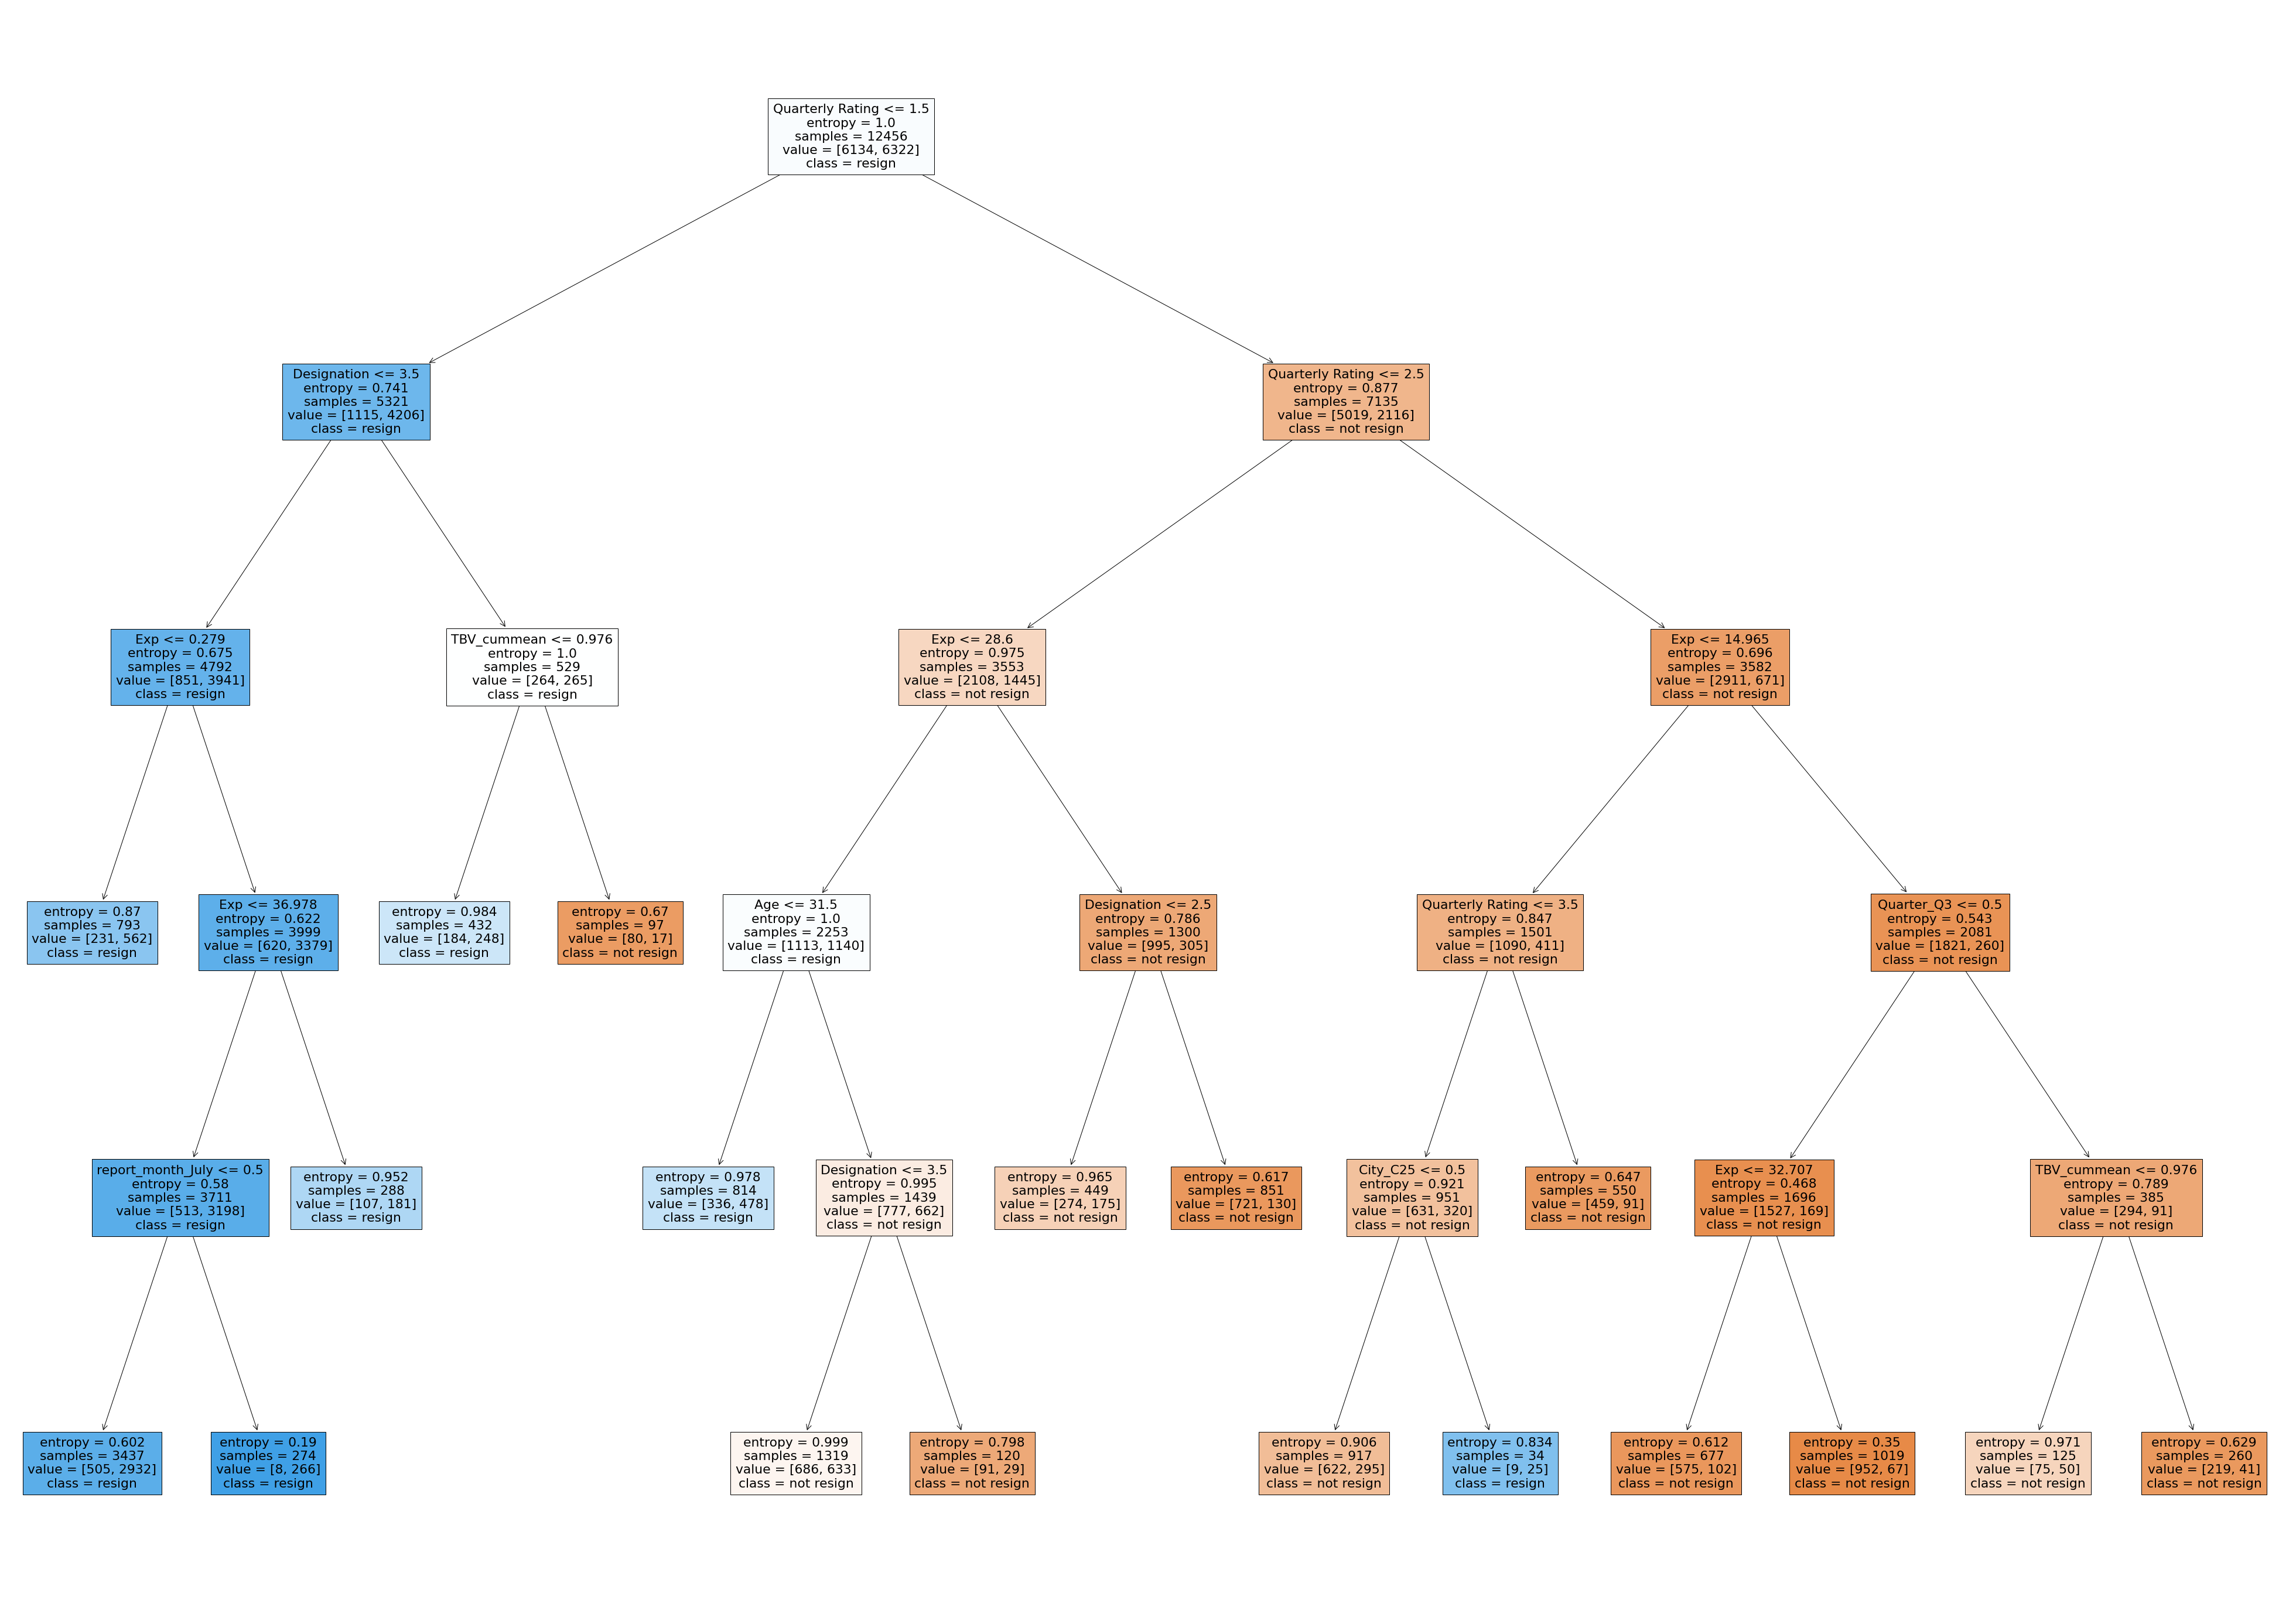

In [57]:
best_param1=optimize_hyperparam(x, y, n_eval=100)

In [58]:
#best_param_dtree1=best_param
best_param_dtree2=best_param1

In [59]:

# best_param_dtree1.fit(x, y)
# y_pred_1 = best_param_dtree1.predict(data_test)

best_param_dtree2.fit(x, y)
y_pred_2 = best_param_dtree2.predict(data_test)


In [60]:
#y_pred_1
y_pred_2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
# data_test[["Target"]]= best_param_dtree1.predict(data_test)

# sol4=data_test[["Target"]].reset_index().rename(columns={"index": "Emp_ID"})

# data_test[["Target"]]= best_param_dtree2.predict(data_test)

# sol6=data_test[["Target"]].reset_index().rename(columns={"index": "Emp_ID"})

data_test[["Target"]]= best_param_dtree2.predict(data_test)

sol7=data_test[["Target"]].reset_index()

In [62]:
sol7_1=sol7[sol7["MMM-YY"]=="2017-12-01"][["Emp_ID","Target"]]

In [63]:
sol7_1["Target"].value_counts()

0    400
1    341
Name: Target, dtype: int64

In [ ]:
sol7_1
sol7_1.to_csv('DT_hyperopt4.csv',index=False)

# Random Forest

In [64]:
data_test=test_fin[cols]
data_test=data_test.drop(["resn_lead6"],axis=1)
data_test.set_index(["Emp_ID","MMM-YY"],inplace=True)

In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [66]:
def optimize_hyperparam_RF(X, y, n_eval=100):
        #X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=test_size, shuffle=self.shuffle)
        X1=X.copy()
        y1=y.copy()
#         y1=pd.get_dummies(y1)['DF']
        X_train, X_test, y_train, y_test = train_test_split(X1 , y1, test_size = 0.2, random_state = 42)
        hyperparameter_space_dtr = {'dtr_criterion': hp.choice('dtr_criterion', ["entropy","gini"]),
                                    
                                    'dtr_max_depth': hp.uniform("dtr_max_depth", 
                                                                2, 10),
                                    'dtr_min_samples_split': hp.uniform("dtr_min_samples_split", 
                                                                        2, 40),
                                    'dtr_min_samples_leaf':  hp.uniform('dtr_min_samples_leaf', 
                                                                        1, 20),
                                    #'dtr_max_leaf_nodes': hp.uniform("dtr_max_leaf_nodes", 
                                                                    #2, 20) 
                    }
        
        RANDOM_SEED = np.random.RandomState(42)
        def fetch_model(search_space_val):
            model = RandomForestClassifier(                
            max_depth=int(search_space_val['dtr_max_depth']),
                
            min_samples_split=int(
              search_space_val['dtr_min_samples_split']),
                
            min_samples_leaf=int(
              search_space_val['dtr_min_samples_leaf']),
                
            #max_leaf_nodes=int(
                #search_space_val['dtr_max_leaf_nodes']),
                
            #criterion='entropy',
            #splitter='best',
            random_state=1)
            return model
        
        def objective_model(sp_space):
            clf =fetch_model(sp_space) 
            rskf = RepeatedStratifiedKFold(n_splits=2, random_state=1)
            acc = cross_val_score(clf, 
                                  X_train, 
                                  y_train,
                                  scoring=make_scorer(f1_score, average='weighted'),
                                  cv=rskf,
                                  n_jobs=1).mean()
            return {"loss": -acc, "status": STATUS_OK }
        
        trials = Trials()
        best = fmin(fn=objective_model, 
                    space=hyperparameter_space_dtr, 
                    algo=anneal.suggest, 
                    max_evals=n_eval, 
                    trials=trials,
                    #rstate=RANDOM_SEED
                    )
        
        best_param = fetch_model(best)
        
        print(best_param)
        
        best_param.fit(X_train, y_train)
        
        y_pred = best_param.predict(X_test)
        print(X_train.columns)
        
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        
#         plot_confusion_matrix(best_param, X_test, y_test ,display_labels=class_names)
#         class_names2 = ['1', '2','3','4', '5','6']
#         plot_confusion_matrix(y_test, y_pred 
#                               ,classes=class_names2
#                              )
        # Compute confusion matrix
        #cnf_matrix = confusion_matrix(y_test, y_pred)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix2(cm, classes=['not resign','resign'],
                      title='Confusion matrix, without normalization')
        plt.show()
        
        print(classification_report(y_test, y_pred 
                                     ,target_names=['not resign','resign']
                                   ))
        
        return best_param    

100%|██████████████████████████████████████████████| 100/100 [17:34<00:00, 10.54s/trial, best loss: -0.776980768848822]
RandomForestClassifier(max_depth=9, min_samples_split=8, random_state=1)
Index(['Age', 'Joining Designation', 'Designation', 'Quarterly Rating', 'Exp',
       'Edu_Level', 'Gender_Male', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4', 'Salary_increase',
       'TBV_cummean', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June', 'report_month_March', 'report_month_May',
       'report_month_November', 'report_month_Octobe

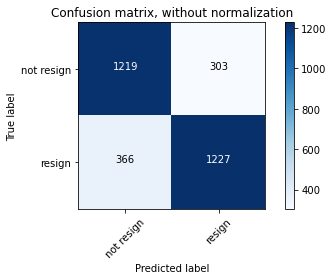

              precision    recall  f1-score   support

  not resign       0.77      0.80      0.78      1522
      resign       0.80      0.77      0.79      1593

    accuracy                           0.79      3115
   macro avg       0.79      0.79      0.79      3115
weighted avg       0.79      0.79      0.79      3115



In [67]:
best_param_rf=optimize_hyperparam_RF(x, y, n_eval=100)

In [68]:
#best_param_dtree1=best_param
best_param_ranforest=RandomForestClassifier(max_depth=9, min_samples_split=29, random_state=1)

In [69]:
best_param_ranforest.fit(x, y)
y_pred_3 = best_param_ranforest.predict(data_test)

In [70]:
#y_pred_1
y_pred_3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
data_test[["Target"]]= best_param_ranforest.predict(data_test)

In [72]:
sol8=data_test[["Target"]].reset_index()#.rename(columns={"index": "Emp_ID",})
sol8_1=sol8[sol8["MMM-YY"]=="2017-12-01"][["Emp_ID","Target"]]
sol8_1


,Emp_ID,Target
1,2,1
6,6,1
7,11,1
10,14,1
16,25,0
...,...,...
3513,2775,1
3514,2778,1
3520,2781,0
3526,2784,0


In [73]:
sol8_1["Target"].value_counts()

0    374
1    367
Name: Target, dtype: int64

In [ ]:
sol8_1.to_csv('Randomforest_hyperopt.csv',index=False)

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
data_test=test_fin[cols]
data_test=data_test.drop(["resn_lead6"],axis=1)
data_test.set_index(["Emp_ID","MMM-YY"],inplace=True)

In [76]:
#Logistic Regression with lead 6
#seperating independent and dependent variables
x = data_train.drop(['resn_lead6'], axis=1)
y = data_train['resn_lead6']
x.shape, y.shape

((15571, 51), (15571,))

In [77]:
def optimize_hyperparam_LR(X, y, n_eval=100):
        #X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=test_size, shuffle=self.shuffle)
        X1=X.copy()
        y1=y.copy()
#         y1=pd.get_dummies(y1)['DF']
        X_train, X_test, y_train, y_test = train_test_split(X1 , y1, test_size = 0.2, random_state = 42)
        hyperparameter_space_dtr = {'warm_start' : hp.choice('warm_start', [True, False]),
                                    'fit_intercept' : hp.choice('fit_intercept', [True, False]),
                                    'tol' : hp.uniform('tol', 0.00001, 0.0001),
                                    'C' : hp.uniform('C', 0.05, 3),
                                    'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
                                    'max_iter' : hp.choice('max_iter', range(100,1000)),
                                    'scale': hp.choice('scale', [0, 1]),
                                    'normalize': hp.choice('normalize', [0, 1]),
                                    'multi_class' : 'auto',
                                    'class_weight' : 'balanced'
                                   }
        
        RANDOM_SEED = np.random.RandomState(42)
        def fetch_model(search_space_val):
            model = LogisticRegression(                
            tol=int(search_space_val['tol']),
                
            C=int(
                search_space_val['C']),
                
#             solver=(hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']))
#                 search_space_val['solver']),
           
                
                
            #criterion='entropy',
            #splitter='best',
#             random_state=1
            )
            return model
        
        def objective_model(sp_space):
            clf =fetch_model(sp_space) 
            rskf = RepeatedStratifiedKFold(n_splits=2, random_state=1)
            acc = cross_val_score(clf, 
                                  X_train, 
                                  y_train,
                                  scoring=make_scorer(f1_score, average='weighted'),
                                  cv=rskf,
                                  n_jobs=1).mean()
            return {"loss": -acc, "status": STATUS_OK }
        
        trials = Trials()
        best = fmin(fn=objective_model, 
                    space=hyperparameter_space_dtr, 
                    algo=anneal.suggest, 
                    max_evals=n_eval, 
                    trials=trials,
                    #rstate=RANDOM_SEED
                    )
        
        best_param = fetch_model(best)
        
        print(best_param)
        
        best_param.fit(X_train, y_train)
        
        y_pred = best_param.predict(X_test)
        print(X_train.columns)
        
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        
#         plot_confusion_matrix(best_param, X_test, y_test ,display_labels=class_names)
#         class_names2 = ['1', '2','3','4', '5','6']
#         plot_confusion_matrix(y_test, y_pred 
#                               ,classes=class_names2
#                              )
        # Compute confusion matrix
        #cnf_matrix = confusion_matrix(y_test, y_pred)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix2(cm, classes=['not resign','resign'],
                      title='Confusion matrix, without normalization')
        plt.show()
        
        print(classification_report(y_test, y_pred 
                                     ,target_names=['not resign','resign']
                                   ))
        return best_param    

100%|███████████████████████████████████████████████| 10/10 [00:12<00:00,  1.26s/trial, best loss: -0.7589726224269068]
LogisticRegression(C=1, tol=0)
Index(['Age', 'Joining Designation', 'Designation', 'Quarterly Rating', 'Exp',
       'Edu_Level', 'Gender_Male', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4', 'Salary_increase',
       'TBV_cummean', 'report_month_August', 'report_month_December',
       'report_month_February', 'report_month_January', 'report_month_July',
       'report_month_June', 'report_month_March', 'report_month_May',
       'report_month_November', 'report_month_October',
       'report_month_September'],
    

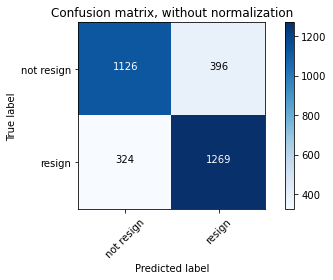

              precision    recall  f1-score   support

  not resign       0.78      0.74      0.76      1522
      resign       0.76      0.80      0.78      1593

    accuracy                           0.77      3115
   macro avg       0.77      0.77      0.77      3115
weighted avg       0.77      0.77      0.77      3115



In [82]:
best_param_lr=optimize_hyperparam_LR(x, y, n_eval=10)

In [83]:
#best_param_dtree1=best_param
best_param_lr1=best_param_lr


In [84]:
best_param_lr1.fit(x, y)
y_pred_3 = best_param_lr1.predict(data_test)

In [85]:
#y_pred_1
y_pred_3


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [86]:
data_test[["Target"]]= best_param_lr1.predict(data_test)


In [87]:

sol9=data_test[["Target"]].reset_index()#.rename(columns={"index": "Emp_ID",})
sol9_1=sol9[sol9["MMM-YY"]=="2017-12-01"][["Emp_ID","Target"]]
sol9_1

,Emp_ID,Target
1,2,1
6,6,1
7,11,1
10,14,1
16,25,0
...,...,...
3513,2775,1
3514,2778,1
3520,2781,0
3526,2784,0


In [88]:
sol9_1[["Target"]].value_counts()

Target
0         415
1         326
dtype: int64

In [ ]:
sol9_1.to_csv('logisticreg_hyperopt.csv',index=False)